In [7]:
import os
import nltk
import pandas
import re

In [46]:
classDict = {'neg': 0, 'pos': 1,'ntr': 2}
label2id = []
def read_File():
    sentences = []
    labels = []
    scrip_dir = os.path.dirname(os.path.realpath('./data1.txt'))
    rel_path = "data1.txt"
    abs_file_path = os.path.join(scrip_dir, rel_path)
    with open(abs_file_path, encoding='utf-8') as f:
        for line in f:
            word = line.split()
            labels.append(word[0])
            label2id.append(classDict[word[0]])
            sentence = re.sub(word[0]+'\t', '', line)
            sentences.append(sentence)
            # print(sentences)
    print('read file complete')
    
    return sentences, labels

In [47]:
sentences, labels = read_File()

read file complete


In [49]:
import pandas as pd

data = {'label': labels,
        'sentence': sentences
        }
df = pd.DataFrame(data, columns = ['label', 'sentence'])

df.head(20)

,label,sentence
0,ntr,ntr amra sobhai raji!!!\n
1,ntr,ntr ajke ki amra jabo?\n
2,ntr,ntr ajke ki argentine jitbe??\n
3,pos,pos amra sobhai valo achi\n
4,pos,pos ajke valo kaj hoyche\n
5,pos,pos ekjon bangladeshi hisabe ami gorbitho\n
6,neg,neg india re kau maira la\n
7,neg,neg chore chore masthotho bhai\n
8,neg,neg pic to dili na hala kmne kortam\n
9,pos,pos taskin re rhakr jonno dhonnobhad.\n


In [50]:
df.describe(include='all')

,label,sentence
count,122,122
unique,3,122
top,pos,ntr amra sobhai raji!!!\n
freq,47,1


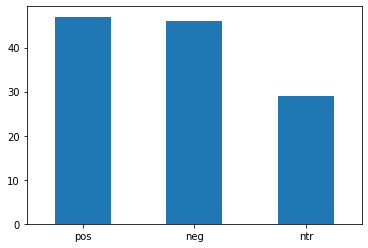

In [51]:
df['label'].value_counts().plot(kind="bar", rot=0)

In [52]:
def cleanTxt(text):
    text = re.sub(r'[^\w\s]', '', text) 
    text=text.lower()
    
    text=re.sub(r'[0-9\.]+', '',text)
    stop_words = open('./stop1.txt', 'r',
                      encoding='utf-8').read().split()
    result = text.split() 
    text = [word.strip()
                           for word in result if word not in stop_words]
    text = " ".join(text)                 
    # text=[wordnet.lemmatize(word)for word in text if word not in set(stopwords.words('english'))]
    # text=' '.join(text)
    return text

In [54]:
df.loc[15,'sentence']

'ntr  13-12-22 nagad/bkash cash back ace?\n'

In [55]:
for i, sent  in enumerate(df['sentence'].tolist()):
    df.loc[i,'clean_sentence'] = cleanTxt(sent)

In [57]:
test = df.loc[15,'clean_sentence']
test

'nagadbkash cash back ace'

In [58]:
def tokenized_data(sent):
    tokenized_text = sent.split()
    return tokenized_text

In [59]:
stop_words = {'amra','ki','ekjon','ntr','pos','neg','to','ta','re','ami','pai','nai','kan','a','o','ki','er','to','on','te','kon','ta','ai','tar','kora','but','second','arr','vai','allah','go','kno','keno','ar','er','ata','da','aj','vai','e','what','bai','click','krte','box','kinar','r','rr','klk','je','kalky','but','ekn','ai','step','by','kbe','ti','sei','vi','jutte','koto','tym','eeeeeeee','jy','ar'}

def remove_stop_words(text):
    text = [w for w in text if not w in stop_words]
    text = ' '.join(text)
    return text

In [60]:
t_data = tokenized_data(test)
r_word = remove_stop_words(t_data)
print('befor :', test)
print('after :', r_word)

befor : nagadbkash cash back ace
after : nagadbkash cash back ace


In [61]:
df['clean_data'] = [remove_stop_words(tokenized_data(sent)) for sent in df['clean_sentence'].tolist()]
#del df['sentence']
df.to_csv('sentiment_analysis_clean_data_new.csv', encoding='utf-8', index=False)

In [62]:
from sklearn.feature_extraction.text import CountVectorizer
stpGram = {}
word_vectorizerGram = CountVectorizer(analyzer='word', ngram_range=(1, 3), min_df=1, lowercase=False,
                                          token_pattern=u'[\S]+', tokenizer=None)
word_vectorizerGram.fit_transform(df['clean_sentence'])
stpGram = word_vectorizerGram.get_feature_names()
print(len(stpGram))

1166


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [63]:
word_vectorizerGram_rsw = CountVectorizer(analyzer='word', ngram_range=(1, 3), min_df=1, lowercase=False,
                                          token_pattern=u'[\S]+', tokenizer=None)
word_vectorizerGram_rsw.fit_transform(df['clean_data'])
stpGram_rsw = word_vectorizerGram_rsw.get_feature_names()
print(len(stpGram_rsw))
print('sample of bigram : ',stpGram_rsw[10])

1166
sample of bigram :  ager price show


In [64]:
import numpy as np
def sentence_to_vector_transform(line, stpGram):
    vec = CountVectorizer(analyzer='word', ngram_range=(1, 2), min_df=1, lowercase=False, token_pattern=u'[\S]+',
                            tokenizer=None, vocabulary=stpGram)
    tList = []
    tList.append(line)
    sent = vec.transform(tList)
    sent = sent.toarray()
    sent = np.squeeze(np.asarray(sent))
    return sent
     

In [65]:
def sentence_to_vector(data, stpGram):
    dataForSVM = []
    colName = []
    dataVec = []
    dataVec.append(colName)
    
    for idx, sent in enumerate(data):
        
        sent = sentence_to_vector_transform(sent, stpGram)
        sentLst = list(sent)
        dtList = []
        try:
            dtList.append(label2id[idx])
            dataForSVM.append(sent)
        except:
            print(idx)
        for item in sentLst:
            dtList.append(item)
        lengthOfEV = len(dtList)
        dataVec.append(dtList)
        
    return dataForSVM

In [66]:
dataForSVM = sentence_to_vector(df['clean_data'], stpGram_rsw)
dataForSVM[0:4]

[array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0])]

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataForSVM, label2id, test_size=0.2, random_state=0)

In [68]:
from sklearn.svm import SVC
C = 1.0  # SVM regularization parameter
linear_svc = SVC(kernel='linear', C=C)
linear_svc = linear_svc.fit(X_train, y_train)

In [69]:
import joblib
import joblib as jb
filename = 'svc_model.sav'
jb.dump(linear_svc, filename)

['svc_model.sav']

In [70]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

def calculate_accuracy(kernel, model):
    y_pred = model.predict(X_test)
    #print the accuracy score of the model
    print(kernel + " accuracy : ",metrics.accuracy_score(y_test, y_pred, normalize = True))
    score = confusion_matrix(y_test, y_pred)
    print('confusion_matrix: \n', score)

In [71]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer

def report(model):
    visualizer = ClassificationReport(model, classes=['Won','Loss'])
    visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
    visualizer.score(X_test, y_test) # Evaluate the model on the test data
    g = visualizer.poof() # Draw/show/poof the data

In [72]:
calculate_accuracy(kernel='linear', model=linear_svc)

linear accuracy :  0.6
confusion_matrix: 
 [[4 4 0]
 [1 9 0]
 [1 4 2]]


In [73]:
rbf_svc = SVC(kernel='rbf', gamma=0.7, C=C)
rbf_svc = rbf_svc.fit(X_train, y_train)
calculate_accuracy(kernel='rbf', model=rbf_svc)

rbf accuracy :  0.28
confusion_matrix: 
 [[ 7  1  0]
 [10  0  0]
 [ 6  1  0]]


In [74]:
poly_svc = SVC(kernel='poly', degree=3, C=C)
poly_svc = poly_svc.fit(X_train, y_train)
calculate_accuracy(kernel='rbf', model=poly_svc)

rbf accuracy :  0.44
confusion_matrix: 
 [[ 1  7  0]
 [ 0 10  0]
 [ 0  7  0]]


In [75]:
def calculate_accuracy(predictions, actual, modelName):
    total = len(predictions)
    idx = 0
    error = 0
    almostSame = 0
    while idx < total:
        if predictions[idx] != actual[idx]:
            p = predictions[idx]
            a = actual[idx]
            # print('actual=',y_test[idx],'  predict=',predictions[idx])
            if ((a == 0 or a == 1) and (p == 0 or p == 1)) or ((a == 3 or a == 4) and (p == 3 or p == 4)):
                almostSame += 1
            else:
                error += 1
        idx += 1
    print('\n', modelName, '\n')
    print("total=", total)
    print("error=", error)
    print("accuracy = ", ((total - error) * 100) / total)
    print('almost same = ', almostSame)
    print("actual accracy = ", ((total - error - almostSame) * 100) / total)

In [76]:
y_pred = linear_svc.predict(X_test)
calculate_accuracy(y_pred, y_test, 'Linear')

y_pred_rbf = rbf_svc.predict(X_test)
calculate_accuracy(y_pred_rbf, y_test, 'rbf_svc')

y_pred_poly = poly_svc.predict(X_test)
calculate_accuracy(y_pred_poly, y_test, 'poly_svc')


 Linear 

total= 25
error= 5
accuracy =  80.0
almost same =  5
actual accracy =  60.0

 rbf_svc 

total= 25
error= 7
accuracy =  72.0
almost same =  11
actual accracy =  28.0

 poly_svc 

total= 25
error= 7
accuracy =  72.0
almost same =  7
actual accracy =  44.0


In [77]:
from sklearn.ensemble import AdaBoostClassifier

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:

    abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=learning_rate)
    
    abc_model = abc.fit(X_train, y_train)
    
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(abc_model.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(abc_model.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.835
Accuracy score (validation): 0.440
Learning rate:  0.075
Accuracy score (training): 0.835
Accuracy score (validation): 0.440
Learning rate:  0.1
Accuracy score (training): 0.814
Accuracy score (validation): 0.480
Learning rate:  0.25
Accuracy score (training): 0.753
Accuracy score (validation): 0.440
Learning rate:  0.5
Accuracy score (training): 0.691
Accuracy score (validation): 0.480
Learning rate:  0.75
Accuracy score (training): 0.670
Accuracy score (validation): 0.480
Learning rate:  1
Accuracy score (training): 0.784
Accuracy score (validation): 0.560


In [82]:
sent = 'nagadbkash cash '

sent = cleanTxt(sent)
sent2vec =sentence_to_vector_transform(sent, stpGram)
sent_list = list()
sent_list.append(sent2vec)

loaded_model = jb.load(filename)
print(sent_list)
predictions = loaded_model.predict(sent_list)
print(predictions)

ans = ""
print(classDict)
for key, value in classDict.items():
    if value == predictions[0]:
        ans = key
print(ans)

[array([0, 0, 0, ..., 0, 0, 0])]
[2]
{'neg': 0, 'pos': 1, 'ntr': 2}
ntr
